<a href="https://colab.research.google.com/github/nimbbul/net/blob/master/yolact_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required packages

In [ ]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
!pip install gdown

In [ ]:
%%shell
cd /content

# images and json
gdown --id 1SXt_k5mcLcgp85MqSWFv2ClH1mDhe2wr  # https://drive.google.com/file/d/1SXt_k5mcLcgp85MqSWFv2ClH1mDhe2wr/view

# config
gdown --id 1T7vXMF54AEMhsVz9PEJJHCsuaKqXWhYL  # https://drive.google.com/file/d/1T7vXMF54AEMhsVz9PEJJHCsuaKqXWhYL/view

# base weights
gdown --id 10WT6w51sQ5z9hsFJleTXaHsZKi3Abb_t  # https://drive.google.com/file/d/10WT6w51sQ5z9hsFJleTXaHsZKi3Abb_t/view

# trained weights
gdown --id 1-0QXHVP195eUf3QRO-o_hLCnGafHjrLc  # https://drive.google.com/file/d/1-0QXHVP195eUf3QRO-o_hLCnGafHjrLc/view


# Clone the repo
# git clone https://github.com/dbolya/yolact.git
git clone https://github.com/JI411/yolact
# git clone https://github.com/ar90n/yolact.git

# change config file to custom
rm /content/yolact/data/config.py
cp /content/config.py /content/yolact/data/

unzip few_data.zip

Downloading...
From: https://drive.google.com/uc?id=1SXt_k5mcLcgp85MqSWFv2ClH1mDhe2wr
To: /content/few_data.zip
100% 8.65M/8.65M [00:00<00:00, 40.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T7vXMF54AEMhsVz9PEJJHCsuaKqXWhYL
To: /content/config.py
100% 31.7k/31.7k [00:00<00:00, 46.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10WT6w51sQ5z9hsFJleTXaHsZKi3Abb_t
To: /content/yolact_resnet50_54_800000.pth
100% 127M/127M [00:01<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0QXHVP195eUf3QRO-o_hLCnGafHjrLc
To: /content/yolact_base_201_2013_interrupt.pth
100% 123M/123M [00:00<00:00, 158MB/s]
Cloning into 'yolact'...
remote: Enumerating objects: 2662, done.
remote: Total 2662 (delta 0), reused 0 (delta 0), pack-reused 2662
Receiving objects: 100% (2662/2662), 21.13 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (1806/1806), done.
rm: cannot remove '/content/yolact/data/config.py': No such file or directory
cp: cannot create regular file '/con

In [ ]:
# Cython needs to be installed before pycocotools
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib


# Downgrade torch to accommodate DCNv2
# !pip install torchvision==0.5.0
# !pip install torch==1.4.0


!git clone https://github.com/comptech-winter-school/coal-composition-control -b dev
%cd coal-composition-control
!pip install -r requirements.txt

Cloning into 'coal-composition-control'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 181 (delta 65), reused 152 (delta 43), pack-reused 0
Receiving objects: 100% (181/181), 26.94 MiB | 12.75 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/coal-composition-control
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 631 kB 20.5 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 376 kB 61.9 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=5cffc71955f1f4a75cb76e7db76fa9590d5f5e4fe6cf5ecb4732da7c1f2ba369
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=9fef4d56ce9fd7

In [ ]:
# # Change to the right directory
# %cd /content/yolact/external/DCNv2

# # Build DCNv2
# !python setup.py build develop

In [ ]:
%cd /content/coal-composition-control/src/instance_segmentation/

from vgg_to_coco import vgg_to_coco
# vgg_to_coco(dataset_dir='/content/drive/MyDrive/Comptech2022/few_data', vgg_path='/content/drive/MyDrive/Comptech2022/few_data/few_data.json')
# vgg_to_coco(dataset_dir='/content/drive/MyDrive/Comptech2022/few_data/valid_data', vgg_path='/content/drive/MyDrive/Comptech2022/few_data/valid_data/valid_data.json')

vgg_to_coco(dataset_dir='/content/few_data', vgg_path='/content/few_data/few_data.json')
vgg_to_coco(dataset_dir='/content/few_data/valid_data', vgg_path='/content/few_data/valid_data/valid_data.json')

/content/coal-composition-control/src/instance_segmentation


In [ ]:
# %cd /content/yolact
!mkdir -p /content/yolact/weights/
!cp /content/yolact_resnet50_54_800000.pth /content/yolact/weights/
!cp /content/yolact_base_201_2013_interrupt.pth /content/yolact/weights/

# !cp /content/drive/MyDrive/Comptech2022/weights/yolact_base_54_800000.pth /content/yolact/weights/
# !cp /content/yolact/weights/yolact_base_44_449_interrupt.pth  /content/drive/MyDrive/Comptech2022/weights/


/content/yolact


In [ ]:
# %cd /content/yolact/yolact
!python train.py --batch_size 2 --config=yolact_base_config --resume=/content/yolact/weights/yolact_resnet50_54_800000.pth --start_iter=0 --num_workers 1

In [ ]:
# ! cp /content/yolact/weights/yolact_base_201_2013_interrupt.pth  /content/drive/MyDrive/Comptech2022/weights/

# Inference

In [ ]:
# Delete any previous output_images folder (in case we're running this more than once)
# !rm /content/output_images -r

# Create a new directory for output images
!mkdir -p /content/output_images
!cp /content/yolact_base_201_2013_interrupt.pth /content/yolact/weights/

# Run inference using our pre-trained weights on all images in the directory
!python ./eval.py --trained_model=/content/yolact/weights/yolact_base_201_2013_interrupt.pth --config=yolact_base_config --score_threshold=0.15 --top_k=25 --images=/content/few_data:/content/output_images

output_images_2/20210712_141048_857A_ACCC8EAF31F3_360.png


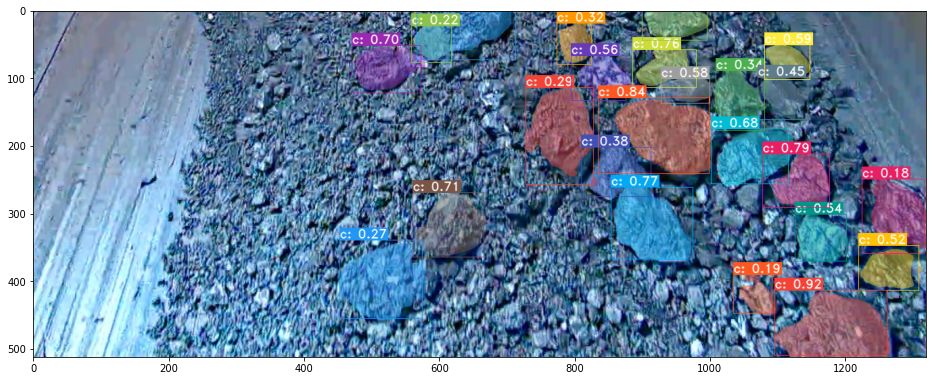

output_images_2/20210712_141048_857A_ACCC8EAF31F3_0.png


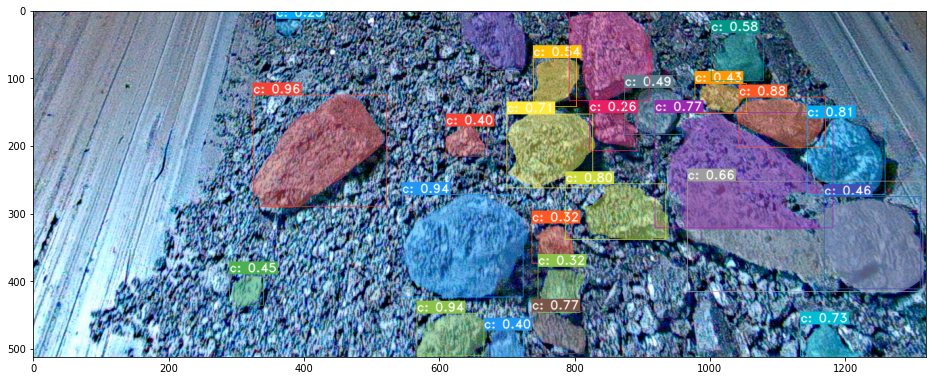

output_images_2/20210712_141048_857A_ACCC8EAF31F3_30.png


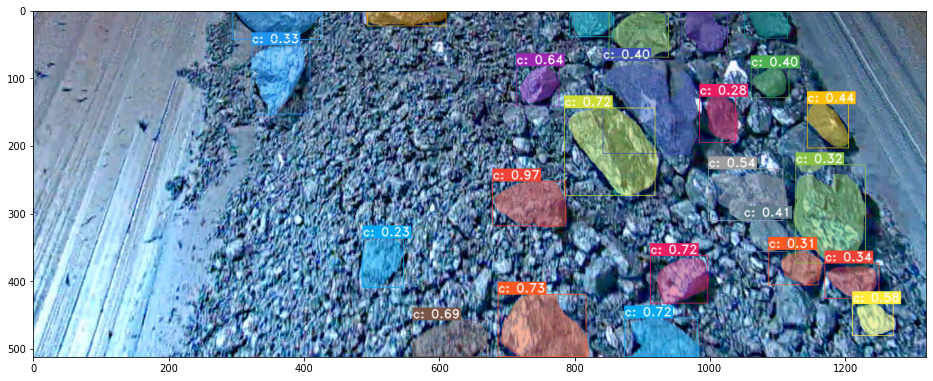

output_images_2/20210712_141048_857A_ACCC8EAF31F3_120.png


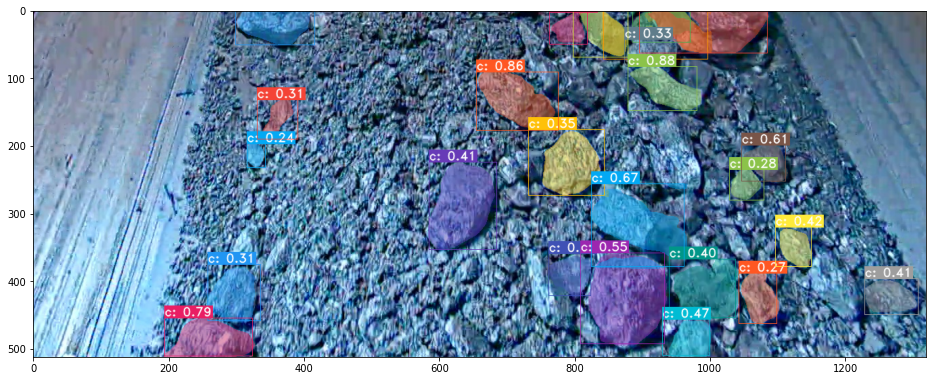

output_images_2/20210712_141048_857A_ACCC8EAF31F3_540.png


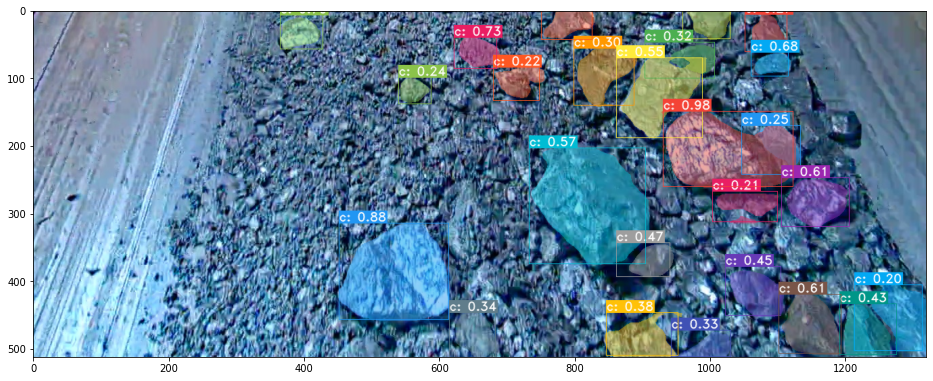

output_images_2/20210712_141048_857A_ACCC8EAF31F3_210.png


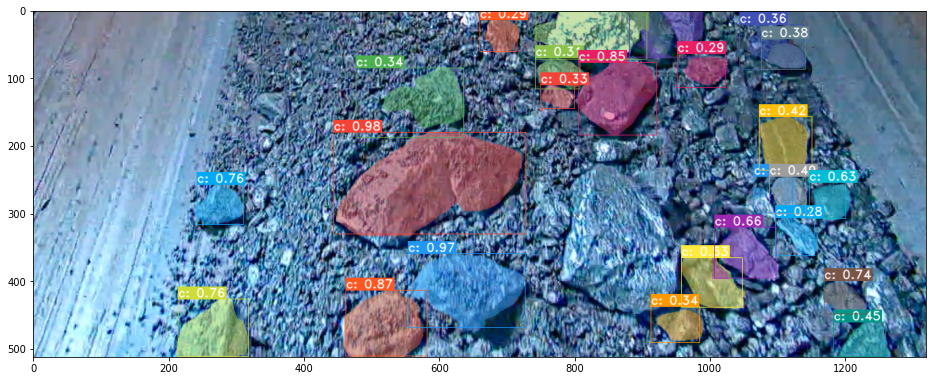

output_images_2/20210712_141048_857A_ACCC8EAF31F3_240.png


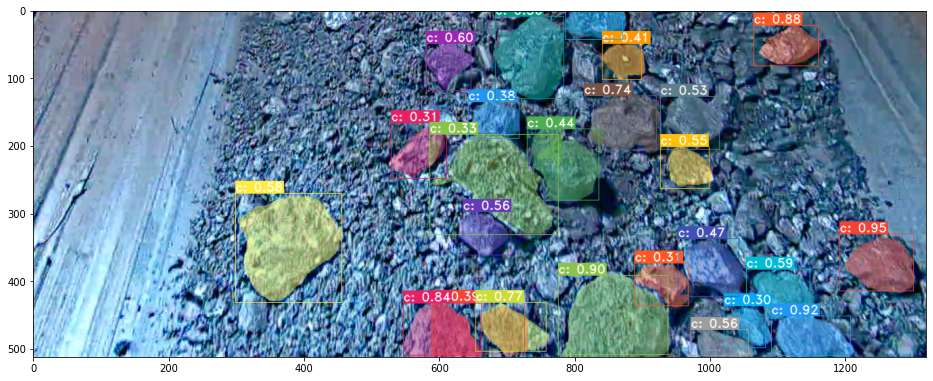

In [ ]:
output_images = Path('output_images')

def show_image(img_path):
  img = cv2.imread(img_path)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(16,16))
  plt.imshow(img_cvt)
  plt.show()

# Iterate through all of the output images and display them
for img_path in output_images.iterdir():
  print(img_path)
  show_image(str(img_path))